#### Bayes theorem

You're testing for a disease and advertising that the test is 99% accurate; that is if you __have the disease__, you will __test positive 99%__ of the time, and if you __don't have the disease__, you will __test negative 99%__ of the time. Let's say that __1% of all people have the disease__ and someone __tests positive__. What's the probability that the person __has the disease__? 

In [1]:
P_disease = 0.01
P_test = .99*.01 + .01*.99
P_test_dis = .99
P_dis_test = P_test_dis*P_disease / P_test
print(P_dis_test)

0.5


#### The Law of Large Number % The Central limit Theorem

__The Law of Large Number__ states that when sample size tends to infinity, the sample mean _equals to population mean_. <br>
__The Central limit Theorem__ states that when sample size tends to infinity, the sample mean will be _normally_ distributed.

In [2]:
from numpy.random import randint

# Create a sample of 10 die rolls
small = randint(1, 7, 10)
small_mean = small.mean()
print(small_mean)

# Create a sample of 1000 die rolls
large = randint(1, 7, 1000)
large_mean = large.mean()
print(large_mean)

4.2
3.592


In [3]:
import matplotlib.pyplot as plt

means = [randint(1, 7, 30).mean() for i in range(1000)]
plt.hist(means, bins=12)
plt.show();

<Figure size 640x480 with 1 Axes>

## Distributions

<img src="https://i.pinimg.com/originals/2a/02/ee/2a02eea82f57d0e4b0ce7c1b8ba6906d.jpg">

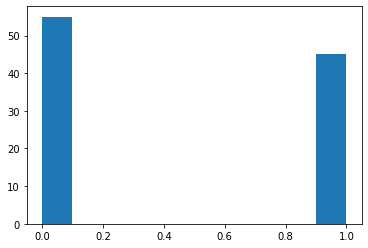

In [4]:
# Bernoulli [coin flip]
from scipy.stats import bernoulli
plt.hist(bernoulli.rvs(p=0.5, size=100));

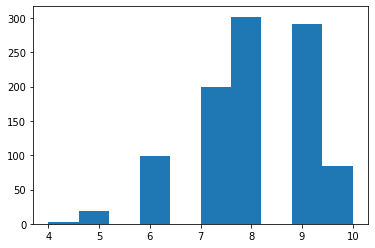

8 or less (out of 10) :  0.6241903616
10 or less (out of 10) :  1.0


In [5]:
# Binomial [how many balls in basket if you're given 10 trials, p=0.8]
from scipy.stats import binom
plt.hist(binom.rvs(n=10, p=0.8, size=1000))
plt.show()

prob1 = binom.cdf(k=8, n=10, p=0.8) # 8 or less (out of 10)
print('8 or less (out of 10) : ', prob1)

prob2 = binom.cdf(k=10, n=10, p=0.8) # 10 or less (out of 10)
print('10 or less (out of 10) : ', prob2)

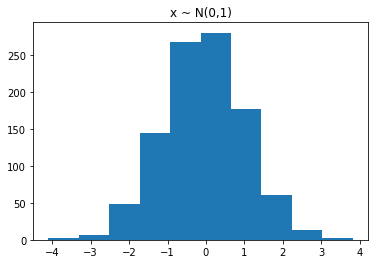

True P(N>2) : 0.02275013194817921
Sample P(N>2) : 0.028


In [6]:
# Noramal
from scipy.stats import norm
data = norm.rvs(size=1000)
plt.hist(data)
plt.title('x ~ N(0,1)')
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print('True P(N>2) :', true_prob)

# Compute and print sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print('Sample P(N>2) :', sample_prob)

In [7]:
# Poisson [in any 15min interval p=0.2 to see at least one shooting star. 
# What's the P to see at least one shooting star in an hour?]
from scipy.stats import poisson
import numpy as np
m = [poisson.rvs(0.2, size=1).mean() for i in range(1000)]
np.mean(m)

0.19

## Descriptive statistics

In [8]:
import pandas as pd
weather = pd.read_csv('weather.csv', index_col='id')

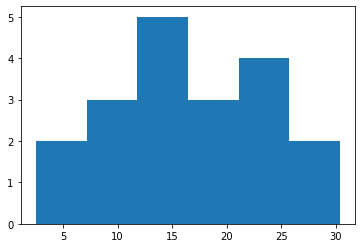

Mean 16.989473684210527
Median 16.2
Temp9am is skewed right


In [10]:
plt.hist(weather.Temp9am, bins=6)
plt.show()
print('Mean', weather.Temp9am.mean())
print('Median', weather.Temp9am.median())
print('Temp9am is skewed right')

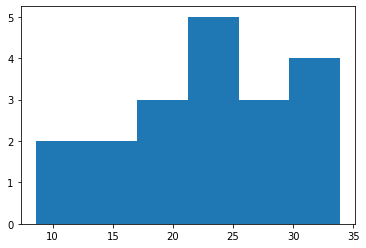

Mean 22.873684210526317
Median 23.1
Temp3pm is skewed left


In [11]:
plt.hist(weather.Temp3pm, bins=6)
plt.show()
print('Mean', weather.Temp3pm.mean())
print('Median', weather.Temp3pm.median())
print('Temp3pm is skewed left')

std  $ S_x = \sqrt{ \frac{\sum{(x_i-\overline{x})^2}}{n-1} } $

$Cov_xy = \frac{ \sum{(x_i-\overline{x})(y_i-\overline{y})} } {n-1}$

Pearson's correlation $ r = \frac{Cov_{xy}}{S_x  S_y} $  is bad with outliers

$ r^2 $ is the amount of Y explained by X

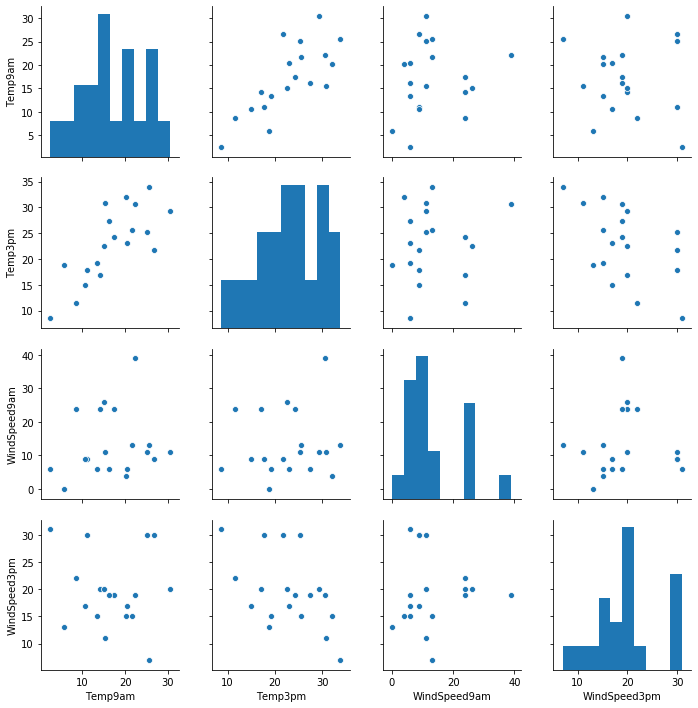

In [12]:
import seaborn as sns
sns.pairplot(weather);

In [13]:
r = weather['Temp9am'].corr(weather['Temp3pm'])
print('Correlation', round(r,3))
r2 = r**2
print('Temp9am explains', round(r2*100,1), '%  of Temp3pm')

Correlation 0.759
Temp9am explains 57.6 %  of Temp3pm


### Confidence intervals

Means 
<font size="3"> $ \overline{X} \pm Z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$ </font>

In [14]:
import scipy.stats as st
a = range(10,14)
print(np.mean(a))
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

11.5


(9.445739743239121, 13.554260256760879)

In [15]:
from scipy.stats import sem, t
data = [1, 2, 3, 4, 5]
confidence = 0.95
z_score = 2.7764

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score

# Compute and print the lower threshold
lower = np.mean(data) - margin_error
print(lower)

# Compute and print the upper threshold
upper = np.mean(data) + margin_error
print(upper)

1.0367887327136691
4.963211267286331


## Hypothesis testing

In [16]:
results = pd.read_csv('results.csv', index_col='id')

In [17]:
# One tailed z-test

num_control = results[results['Group'] == 'control']['Converted'].sum()
total_control = len(results[results['Group'] == 'control'])

num_treat = results[results['Group'] == 'treatment']['Converted'].sum()
total_treat = len(results[results['Group'] == 'treatment'])

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('p-value of treatment is {0:0.3f}'.format(pval))
print('significant')

p-value of treatment is 0.009
significant


In [18]:
laptops = pd.read_csv('laptops1.csv', index_col='id')

In [19]:
# Two tailed t-test

asus = laptops[laptops['Company'] == 'Asus']['Price']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('p-value of difference in prices is {0:0.3f}'.format(pval))
print('unsignificant')

p-value of difference in prices is 0.133
unsignificant


#### Calculating sample size

How many samples per variant we'll need? <br>
Conversion rate increases from __20%__ to __25%__. Alpha (1-significance) __5%__. Power __95%__.<br>
Lowering the power allowes fewer observations in sample, yet increases chance of a Type II error.

In [20]:
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=0.95)
print(sample_size)

1807.7621477153257


In [21]:
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=0.8)
print(sample_size)

1091.8961587171943


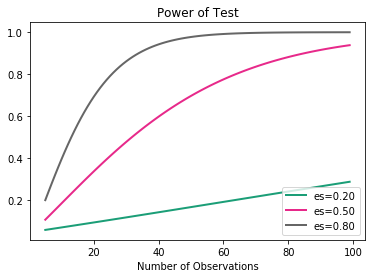

In [22]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [23]:
# Print error rate for N tests with 5% significance
error_rate30 = 1 - (.95**(30))
error_rate20 = 1 - (.95**(20))
error_rate10 = 1 - (.95**(10))
print(error_rate30, error_rate20, error_rate10)

0.7853612360570628 0.6415140775914581 0.4012630607616213


In [24]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')
print(p_adjusted[0])
print(p_adjusted[1])

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


The Bonferroni correction corrected the family-wise error rate for 5 hypothesis test results. In the end, only one of the tests remained signficant. 

## Regression

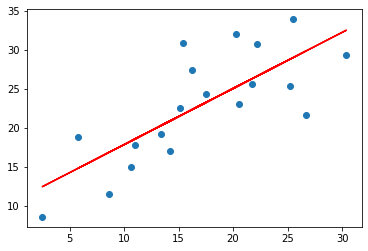

[0.71889677]


In [25]:
from sklearn.linear_model import LinearRegression 
X = np.array(weather['Temp9am']).reshape(-1,1)
y = weather['Temp3pm']

lm = LinearRegression()
lm.fit(X, y)
preds = lm.predict(X)

plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

coef = lm.coef_
print(coef)

The Temperature drops about 30% from morning to afternoon.

If there aren't too many outliers, mean squared error would be a good choice.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
preds = lm.predict(X)
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print('MSE', mse)
print('MAE', mae)

MSE 19.983397307780876
MAE 3.790757274402375


### Missing values, outliers

In [27]:
mean, std = laptops.Price.mean(), laptops.Price.std()

# Compute and print the upper and lower threshold
cut_off = std*3
lower, upper = mean - cut_off, mean + cut_off
print(lower, 'to', upper)

outliers = laptops[(laptops['Price'] > upper) | 
                   (laptops['Price'] < lower)]
print(outliers)

laptops = laptops[(laptops['Price'] <= upper) | 
                  (laptops['Price'] >= lower)]

-837.1018309005708 to 3121.7014425510565
    Company            Product   Price
id                                    
65     Asus  ROG G703VI-E5062T  3890.0
262    Asus         ROG G701VO  3975.0
